In [122]:
import numpy as np
import scipy.constants as phy_const
import matplotlib.pyplot as plt
import pickle
import math
import os

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import glob
import sys
import configparser


In [123]:
dirname = os.getcwd()
datapath = dirname+"/Results/Data"
figurespath = dirname+"/Results/Figures"

## Test the programation of the magnetic field

Implemented in FLHET_compiled.py the magnetic field as it is in Thomas'S Charoy thesis:

$$
B(x) = a_k \exp{( -\frac{(x - x_{Bmax})^2}{2 \sigma_k^2} )} + b_k
$$
With $k = 1$ for $x \leq x_{Bmax}$ and $k = 2$ for $x > x_{Bmax}$.

In the script, the $a_k, b_k$ are calculated as function of input parameters which are:

* $B_{max}$, the maximum amplitude of the magnetic field, reached at $x = x_{Bmax}$.

* $B_{0}$, the magnetic field at $x = 0$.

* $B_{Lx}$, the magnetic field at $x = L_x$.

* The $\sigma_k$, lengthscales of B variation.

With these previous quantities:
$$ a_1 = \frac{B_{max} - B_0}{1 - \exp{(-\frac{x_{Bmax}^2}{2 \sigma_1^2})}} $$
$$ a_2 = \frac{B_{max} - B_{Lx}}{1 - \exp{(-\frac{(L_x - x_{Bmax})^2}{2 \sigma_2^2})}} $$
$$ b_1 = B_{max} - a_1 $$
$$ b_2 = B_{max} - a_2 $$


In [124]:
LX  = 0.0250
LTHR= 0.0075

In [125]:
BMAX= 10e-3 # Max Mag field
B0  = 6e-3  # Mag field at x=0
BLX = 1e-3  # Mag field at x=LX
LB1 = 0.25*LX  # Length for magnetic field
LB2 = 0.25*LX  # Length for magnetic field

In [126]:
NBPOINTS = 200
Delta_x = LX / NBPOINTS

In [127]:
x_center = np.linspace(Delta_x, LX - Delta_x, NBPOINTS)  # Mesh in the center of cell

In [128]:
a1 = (BMAX - B0)/(1 - math.exp(-LTHR**2/(2*LB1**2)))
a2 = (BMAX - BLX)/(1 - math.exp(-(LX - LTHR)**2/(2*LB2**2)))
b1 = BMAX - a1
b2 = BMAX - a2
Barr1 = a1*np.exp(-(x_center - LTHR)**2/(2*LB1**2)) + b1
Barr2 = a2*np.exp(-(x_center - LTHR)**2/(2*LB2**2)) + b2    # Magnetic field outside the thruster

Barr = np.where(x_center <= LTHR, Barr1, Barr2)

In [129]:
# imports Charoy's plot data
def conv(text):
    textstr = str(text)
    textstr.replace(',','.')

    try:
        f = float(textstr)
    except:
        return float('nan')
    else:
        return f

datacharoy = np.loadtxt(datapath+"/plot_digitizer_from_Charoy_fig4-6a/B_max100.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 

In [130]:
datacharoy

array([[2.21978156e-02, 6.19036608e+01],
       [5.61570847e-02, 6.44214058e+01],
       [9.01158234e-02, 6.69624632e+01],
       [1.24075093e-01, 6.94802081e+01],
       [1.58034362e-01, 7.19979531e+01],
       [1.91992570e-01, 7.45623229e+01],
       [2.25951309e-01, 7.71033803e+01],
       [2.59911108e-01, 7.95978128e+01],
       [2.93873030e-01, 8.19989955e+01],
       [3.26291502e-01, 8.42789534e+01],
       [3.71069341e-01, 8.70111729e+01],
       [4.05036036e-01, 8.92025435e+01],
       [4.39009627e-01, 9.10908522e+01],
       [4.72985870e-01, 9.28625987e+01],
       [5.06965826e-01, 9.44711579e+01],
       [5.40950556e-01, 9.58699051e+01],
       [5.74938999e-01, 9.71054652e+01],
       [6.08932746e-01, 9.81079006e+01],
       [6.42930736e-01, 9.89238365e+01],
       [6.76934031e-01, 9.95066478e+01],
       [7.10945813e-01, 9.97164599e+01],
       [7.44955473e-01, 1.00019522e+02],
       [7.78978925e-01, 9.97164599e+01],
       [8.13000785e-01, 9.94833354e+01],
       [8.470321

In [131]:
x_charoy = datacharoy[:, 0]
B_charoy = datacharoy[:, 1]

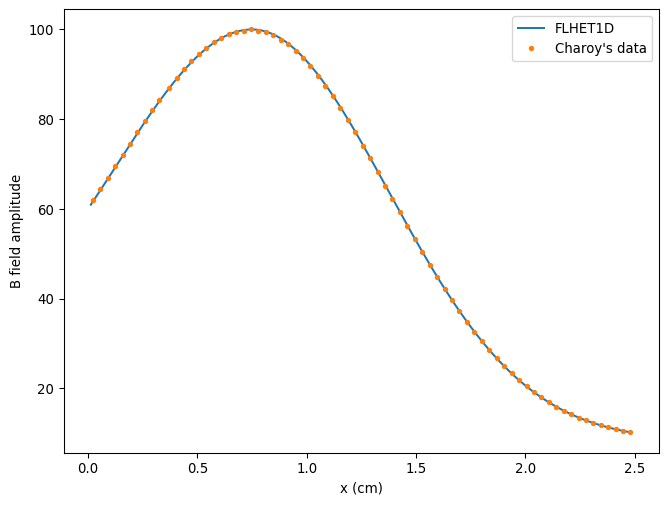

In [132]:
fig = plt.figure(figsize=(8,6), dpi=96)
plt.plot(x_center*100, Barr*10000, label='FLHET1D')
plt.plot(x_charoy, B_charoy, marker='.', linestyle='', label="Charoy's data")
plt.xlabel("x (cm)")
plt.ylabel("B field amplitude")
plt.legend()
plt.show()

## Test the ionization process

Implemented in FLHET_compiled.py the ionization profile as it is in Thomas'S Charoy thesis:

$$
S(x) = S_0 \cos{(\pi \frac{x - x_m}{x_2 - x_1})}
$$
For $x \in [x_1, x_2]$, and $S(x) = 0$ elsewhere.

With $x_m = \frac{x_1 + x_2}{2}$.


In [133]:
SIZMAX = 5.2e23
LSIZ1 = 0.0025
LSIZ2 = 0.0100

In [134]:
xm = (LSIZ1 + LSIZ2)/2
Siz_arr = SIZMAX*np.cos(math.pi*(x_center - xm)/(LSIZ2 - LSIZ1))
Siz_arr = np.where((x_center < LSIZ1)|(x_center > LSIZ2), 0., Siz_arr)

In [135]:
# imports Charoy's plot data
datacharoy = np.loadtxt(datapath+"/plot_digitizer_from_Charoy_fig4-6a/S_iz.csv", converters = (lambda s: float(s.decode("UTF-8").replace(",", "."))), delimiter=";") 

In [136]:
datacharoy

array([[ 2.41138626e-02, -7.55600570e-05],
       [ 5.62398947e-02, -1.01459823e-04],
       [ 9.20694682e-02, -7.21192669e-05],
       [ 1.15236152e-01, -7.09462702e-05],
       [ 1.60025074e-01, -6.86784767e-05],
       [ 1.84736203e-01, -6.74272803e-05],
       [ 2.31068149e-01, -4.00573586e-05],
       [ 2.47578402e-01, -1.27732659e-05],
       [ 2.55715452e-01,  1.08453362e-03],
       [ 2.63334147e-01,  2.90710974e-03],
       [ 2.72261023e-01,  5.00481130e-03],
       [ 2.78591575e-01,  6.19958099e-03],
       [ 2.89266040e-01,  8.60524071e-03],
       [ 2.99946630e-01,  1.09030890e-02],
       [ 3.06044258e-01,  1.23141258e-02],
       [ 3.14979048e-01,  1.42725572e-02],
       [ 3.22840292e-01,  1.57094401e-02],
       [ 3.28910394e-01,  1.76049402e-02],
       [ 3.35579444e-01,  2.10399609e-02],
       [ 3.38103950e-01,  1.88922649e-02],
       [ 3.56916191e-01,  2.17510476e-02],
       [ 3.60983836e-01,  2.39410770e-02],
       [ 3.68632361e-01,  2.52386459e-02],
       [ 3.

In [137]:
x_charoy = datacharoy[:, 0]
S_charoy = datacharoy[:, 1]

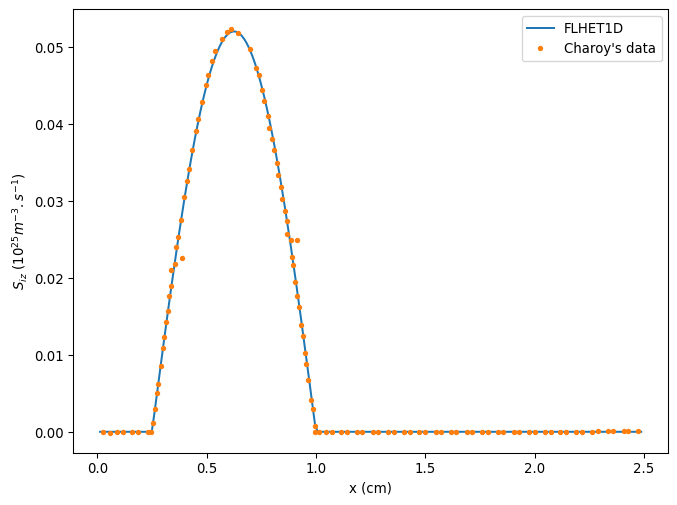

In [138]:
fig = plt.figure(figsize=(8,6), dpi=96)
plt.plot(x_center*100, Siz_arr/(1e25), label='FLHET1D')
plt.plot(x_charoy, S_charoy, marker='.', linestyle='', label="Charoy's data")
plt.xlabel("x (cm)")
plt.ylabel("$S_{iz}$ ($10^{25} m^{-3}.s^{-1}$)")
plt.legend()
plt.show()

In [139]:
RESULTSDIR = './Results/test_230_V_CurrentDriven_235V_5Ohm/'
configFile = RESULTSDIR+'/Configuration.cfg'

In [140]:
config = configparser.ConfigParser()
config.read(configFile)

physicalParameters = config['Physical Parameters']

VG       = float(physicalParameters['Gas velocity'])                 # Gas velocity
M        = float(physicalParameters['Ion Mass'])*phy_const.m_u       # Ion Mass
m        = phy_const.m_e                                             # Electron mass
R1       = float(physicalParameters['Inner radius'])                 # Inner radius of the thruster
R2       = float(physicalParameters['Outer radius'])                 # Outer radius of the thruster
A0       = np.pi * (R2 ** 2 - R1 ** 2)                               # Area of the thruster
LENGTH   = float(physicalParameters['Length of axis'])               # length of Axis of the simulation
L0       = float(physicalParameters['Length of thruster'])           # length of thruster (position of B_max)
alpha_B  = float(physicalParameters['Anomalous transport alpha_B']) # Anomalous transport
mdot     = float(physicalParameters['Mass flow'])                    # Mass flow rate of propellant
Te_Cath  = float(physicalParameters['Temperature Cathode'])          # Electron temperature at the cathode
Rext     = float(physicalParameters['Ballast resistor'])             # Resistor of the ballast
V        = float(physicalParameters['Voltage'])                      # Potential difference
Circuit  = bool(config.getboolean('Physical Parameters', 'Circuit', fallback=False)) # RLC Circuit

# Magnetic field configuration
MagneticFieldConfig = config['Magnetic field configuration']

if MagneticFieldConfig['Type'] == 'Default':
    print(MagneticFieldConfig['Type'] + ' Magnetic Field')
    
    Bmax     = float(MagneticFieldConfig['Max B-field'])                  # Max Mag field
    LB       = float(MagneticFieldConfig['Length B-field'])               # Length for magnetic field
    saveBField = bool(MagneticFieldConfig['Save B-field'])

##########################################################
#           NUMERICAL PARAMETERS
##########################################################
NumericsConfig = config['Numerical Parameteres']

NBPOINTS  = int(NumericsConfig['Number of points'])             # Number of cells
SAVERATE  = int(NumericsConfig['Save rate'])                    # Rate at which we store the data
CFL       = float(NumericsConfig['CFL'])                        # Nondimensional size of the time step
TIMEFINAL = float(NumericsConfig['Final time'])                 # Last time of simulation
Results   = NumericsConfig['Result dir']                        # Name of result directory
TIMESCHEME = NumericsConfig['Time integration']                        # Name of result directory

if not os.path.exists(Results):
    os.makedirs(Results)
with open(Results+'/Configuration.cfg', 'w') as configfile:
    config.write(configfile)
    
Delta_x  = LENGTH/NBPOINTS

KeyError: 'Physical Parameters'

In [ ]:
##########################################################
#           Make the plots
##########################################################


plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["font.family"]   = 'Times New Roman'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2

ResultsFigs = RESULTSDIR+"/Figs"
ResultsData = RESULTSDIR+"/Data"

if not os.path.exists(ResultsFigs):
    os.makedirs(ResultsFigs)
    
%matplotlib notebook

In [ ]:
# open all the files in the directory and sort them to do the video in order
files       = glob.glob(ResultsData + "/*.pkl")
filesSorted = sorted(files, key = lambda x: os.path.getmtime(x), reverse=True)
files.sort(key=os.path.getmtime)


Current = np.zeros(np.shape(files)[0])
Voltage = np.zeros(np.shape(files)[0])
time    = np.zeros(np.shape(files)[0])

In [ ]:
def compute_phi(P, Current,B, configFile):
    def cumtrapz(y, d):
        return np.concatenate((np.zeros(1), np.cumsum(d * (y[1:] + y[:-1]) / 2.0)))
    
    config = configparser.ConfigParser()
    config.read(configFile)

    physicalParameters = config['Physical Parameters']
    Rext     = float(physicalParameters['Ballast resistor'])             # Resistor of the ballast
    LENGTH   = float(physicalParameters['Length of axis'])               # length of Axis of the simulation
    NumericsConfig = config['Numerical Parameteres']

    NBPOINTS  = int(NumericsConfig['Number of points'])             # Number of cells
    Delta_x  = LENGTH/NBPOINTS
    E   = compute_E(P, Current,B, configFile)
    phi = V - Current * Rext - cumtrapz(E, d=Delta_x)  # Discharge electrostatic potential
    return phi
    
def compute_E(P, Current, B, configFile):
    
    config = configparser.ConfigParser()
    config.read(configFile)

    physicalParameters = config['Physical Parameters']

    VG       = float(physicalParameters['Gas velocity'])                 # Gas velocity
    M        = float(physicalParameters['Ion Mass'])*phy_const.m_u       # Ion Mass
    m        = phy_const.m_e                                             # Electron mass
    R1       = float(physicalParameters['Inner radius'])                 # Inner radius of the thruster
    R2       = float(physicalParameters['Outer radius'])                 # Outer radius of the thruster
    A0       = np.pi * (R2 ** 2 - R1 ** 2)                               # Area of the thruster
    LENGTH   = float(physicalParameters['Length of axis'])               # length of Axis of the simulation
    L0       = float(physicalParameters['Length of thruster'])           # length of thruster (position of B_max)
    CURRENT  = float(physicalParameters['Current'])                      # Current
    TION       = float(physicalParameters['Ion temperature'])            # Ion temperature eV
    alpha_B  = float(physicalParameters['Anomalous transport alpha_B']) # Anomalous transport
    mdot     = float(physicalParameters['Mass flow'])                    # Mass flow rate of propellant
    Te_Cath  = float(physicalParameters['Temperature Cathode'])          # Electron temperature at the cathode
    Rext     = float(physicalParameters['Ballast resistor'])             # Resistor of the ballast
    V        = float(physicalParameters['Voltage'])                      # Potential difference
    WALLCOLLS= bool(physicalParameters['Wall collisions'])               # Wall collisions
    Circuit  = bool(config.getboolean('Physical Parameters', 'Circuit', fallback=False)) # RLC Circuit

    # Magnetic field configuration
    MagneticFieldConfig = config['Magnetic field configuration']

    if MagneticFieldConfig['Type'] == 'Default':
        print(MagneticFieldConfig['Type'] + ' Magnetic Field')

        Bmax     = float(MagneticFieldConfig['Max B-field'])                  # Max Mag field
        LB       = float(MagneticFieldConfig['Length B-field'])               # Length for magnetic field
        LBMax    = float(MagneticFieldConfig['Position maximum B-Field'])           # length of thruster (position of B_max)
        saveBField = bool(MagneticFieldConfig['Save B-field'])

    ##########################################################
    #           NUMERICAL PARAMETERS
    ##########################################################
    NumericsConfig = config['Numerical Parameteres']

    NBPOINTS  = int(NumericsConfig['Number of points'])             # Number of cells
    SAVERATE  = int(NumericsConfig['Save rate'])                    # Rate at which we store the data
    CFL       = float(NumericsConfig['CFL'])                        # Nondimensional size of the time step
    TIMEFINAL = float(NumericsConfig['Final time'])                 # Last time of simulation
    Results   = NumericsConfig['Result dir']                        # Name of result directory
    TIMESCHEME = NumericsConfig['Time integration']                        # Name of result directory

    if not os.path.exists(Results):
        os.makedirs(Results)
    with open(Results+'/Configuration.cfg', 'w') as configfile:
        config.write(configfile)
    Delta_x  = LENGTH/NBPOINTS
    
    def trapz(y, d):
        return np.sum( (y[1:] + y[:-1]) )*d/2.0
    def gradient(y, d):
        dp_dz = np.empty_like(y)
        dp_dz[1:-1] = (y[2:] - y[:-2]) / (2 * d)
        dp_dz[0] = 2 * dp_dz[1] - dp_dz[2]
        dp_dz[-1] = 2 * dp_dz[-2] - dp_dz[-3]

        return dp_dz
    m        = phy_const.m_e 

    # MARTIN: Check this
    #############################################################
    #       We give a name to the vars to make it more readable
    #############################################################
    ng = P[0,:]
    ni = P[1,:]
    ui = P[2,:]
    Te = P[3,:]
    ve = P[4,:]
    Gamma_i = ni*ui
    wce     = phy_const.e*B/m              # electron cyclotron frequency

    #############################
    #       Compute the rates   #
    #############################
    Eion    = 12.127# Ionization energy
    E_exc   = 11.6
    Estar   = 80    # Crossover energy
    h_l     = 0.5

    Kexc  = 1.2921e-13*np.exp(-E_exc/Te)
    v_the = np.sqrt(8.*phy_const.e*Te/(np.pi*phy_const.m_e))
    Kiz   = v_the*(-1.024e-24*Te**2 + 6.386e-20*np.exp(-Eion/Te))  
    Kel   = 2.5e-13                                                  # Electron - neutral  collision rate     TODO: Replace by good one

    sigma = 0.5+Te/Estar  # SEE yield
    sigma[sigma > 0.97] = 0.97

    nu_iw = h_l*(1./(R2 - R1))*np.sqrt(phy_const.e*Te/M)       # Ion - wall collision rate
    #Limit the collisions to inside the thruster
    index_L0         = np.argmax(x_center > L0)
    nu_iw[index_L0:] = 0.
    
    nu_ew = nu_iw/(1 - sigma)                                      # Electron - wall collision rate

    if WALLCOLLS:

        nu_m   = ng*Kel + alpha_B*wce  + nu_ew                  # Electron momentum - transfer collision frequency TODO
        
        mu_eff = (phy_const.e/(m*nu_m))*(1./(1 + (wce/nu_m)**2))       # Effective mobility

    else:

            nu_m   = ng*Kel + alpha_B*wce                                 # Electron momentum - transfer collision frequency TODO
            
            mu_eff = (phy_const.e/(phy_const.m_e*nu_m))*(1./(1 + (wce/nu_m)**2))       # Effective mobility

    
    # #############################
    # #       Compute the rates   #
    # #############################
    # Eion    = 12.1  # Ionization energy
    # gamma_i = 1     # Excitation coefficient TODO
    # Estar   = 80    # Crossover energy

    # Kiz = 1.8e-13*(((1.5*Te)/Eion)**0.25)*np.exp(- 4*Eion/(3*Te))  # Ion - neutral  collision rate          TODO: Replace by better
    # Kel = 2.5e-13                                                  # Electron - neutral  collision rate     TODO: Replace by good one

    # sigma = 2.*Te/Estar  # SEE yield
    # sigma[sigma > 0.986] = 0.986

    # nu_iw = (4./3.)*(1./(R2 - R1))*np.sqrt(phy_const.e*Te/M)       # Ion - wall collision rate
    # #Limit the collisions to inside the thruster
    # index_L0         = np.argmax(x_center > L0)
    # nu_iw[index_L0:] = 0.
    
    # nu_ew = nu_iw/(1 - sigma)                                      # Electron - wall collision rate

    # nu_m   = ng*Kel + alpha_B*wce + nu_ew                          # Electron momentum - transfer collision frequency
    
    # mu_eff = (phy_const.e/(m*nu_m))*(1./(1 + (wce/nu_m)**2))       # Effective mobility
    dp_dz  = gradient(ni*Te, d = Delta_x)
    
    I0 = Current/(phy_const.e*A0)
    
    E = (I0 - Gamma_i) / (mu_eff * ni)  # Discharge electric field
    return E


# Open single file

In [ ]:
#####################################
#           Plot variables
#####################################

i_save = -1
file = files[i_save]
with open(file, 'rb') as f:
    [t, P, U, P_Inlet, P_Outlet, J, V, B, x_center] = pickle.load(f)

# Save the current
Current[i_save] = J
Voltage[i_save] = V
time[i_save]    = t

<IPython.core.display.Javascript object>


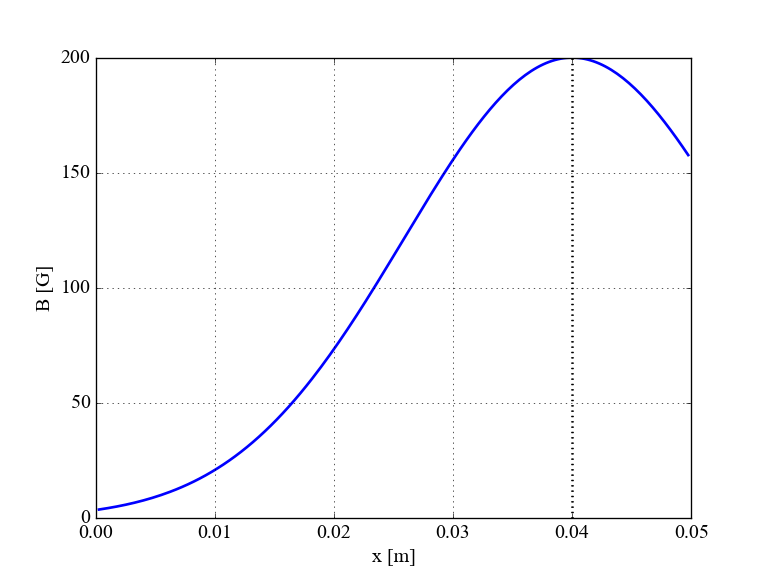

In [ ]:
f, ax = plt.subplots()
ax.plot(x_center, B*1e4)
ax.plot(L0*np.ones(2), [0,200],'k:')
ax.set_ylabel('B [G]')
ax.set_xlabel('x [m]')
ax.grid(True)

<IPython.core.display.Javascript object>


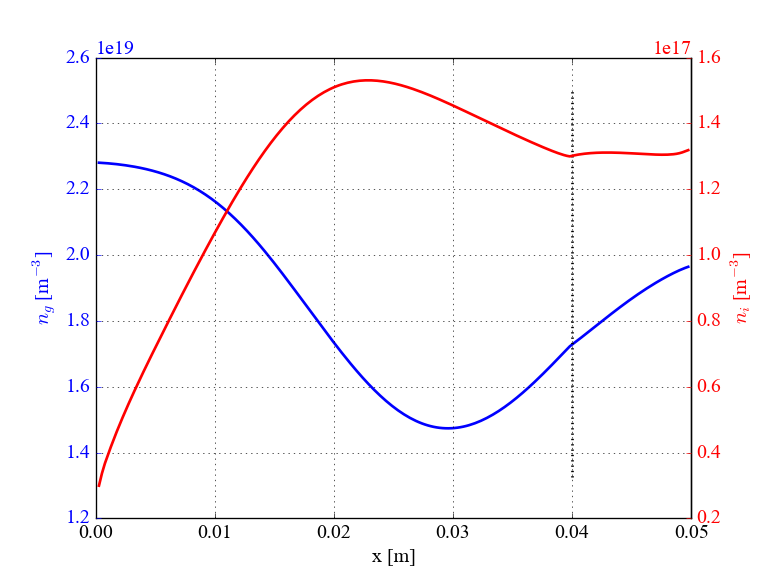

In [ ]:
f, ax = plt.subplots()

ax_n_i=ax.twinx()

ax.plot(x_center, P[0,:])

ax.plot(L0*np.ones(2), [min(P[0,:])*0.9,max(P[0,:])*1.1],'k:')

ax_n_i.plot(x_center, P[1,:], 'r')

ax_n_i.set_frame_on(True)
ax_n_i.patch.set_visible(False)

plt.setp(ax_n_i.spines.values(), visible=False)
ax_n_i.spines["right"].set_visible(True)



ax.set_ylabel('$n_g$ [m$^{-3}$]')
ax_n_i.set_ylabel('$n_i$ [m$^{-3}$]')

ax.set_xlabel('x [m]')

ax.yaxis.label.set_color('b')
ax.tick_params(axis='y', colors='b')

ax_n_i.yaxis.label.set_color('r')
ax_n_i.tick_params(axis='y', colors='r')

ax.grid(True)

<IPython.core.display.Javascript object>


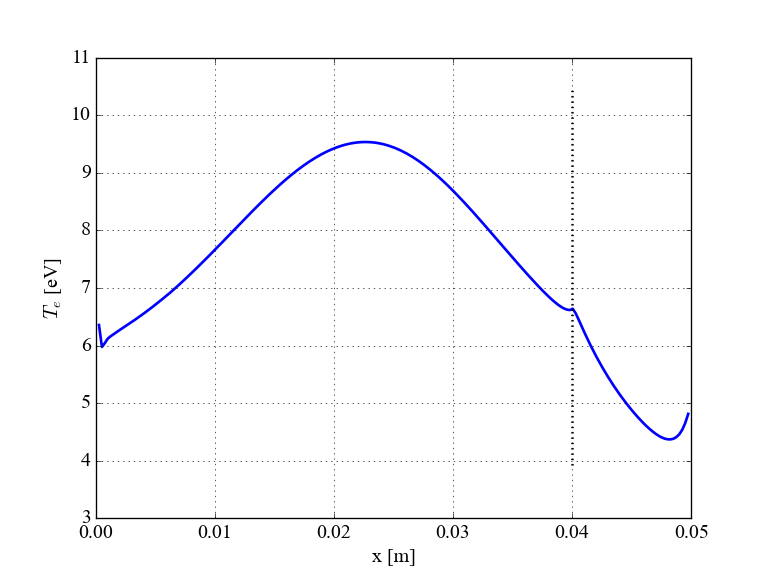

In [ ]:
f, ax = plt.subplots()

ax.plot(x_center, P[3,:])

ax.plot(L0*np.ones(2), [min(P[3,:])*0.9,max(P[3,:])*1.1],'k:')


ax.set_ylabel('$T_e$ [eV]')
ax.set_xlabel('x [m]')

ax.grid(True)

<IPython.core.display.Javascript object>


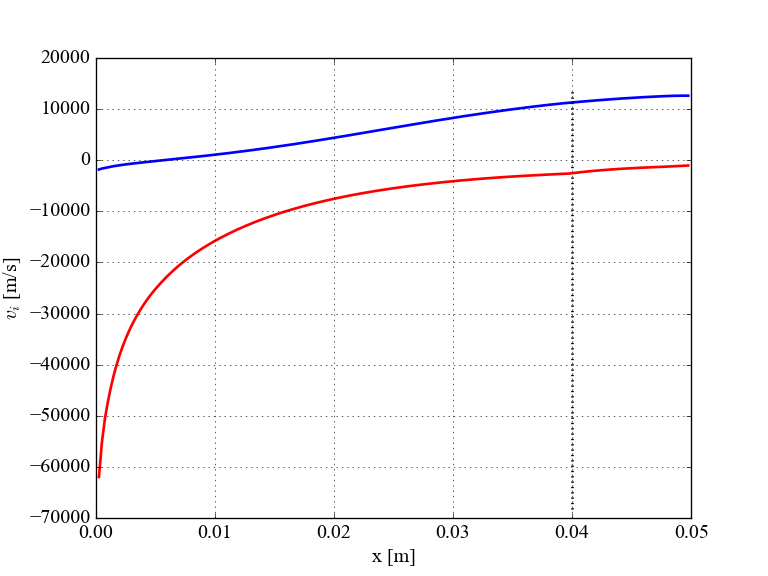

In [ ]:
f, ax = plt.subplots()

# ax_v_e=ax.twinx()

ax.plot(x_center, P[2,:])

ax.plot(L0*np.ones(2), [min(P[4,:])*1.1,max(P[2,:])*1.1],'k:')

ax.plot(x_center, P[4,:], 'r')

# ax_v_e.set_frame_on(True)
# ax_v_e.patch.set_visible(False)

# plt.setp(ax_v_e.spines.values(), visible=False)
# ax_v_e.spines["right"].set_visible(True)



ax.set_ylabel('$v_i$ [m/s]')
# ax_v_e.set_ylabel('$v_e$ [m/s]')

ax.set_xlabel('x [m]')

# ax_v_e.yaxis.label.set_color('r')
# ax_v_e.tick_params(axis='y', colors='r')

ax.grid(True)